In [15]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [17]:
# Generate dataset
trX = np.linspace(-1, 1, 101)
#trX =   (trX - np.min(trX)) / (np.max(trX) - np.min(trX))
#print(trX)

[-1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82 -0.8  -0.78
 -0.76 -0.74 -0.72 -0.7  -0.68 -0.66 -0.64 -0.62 -0.6  -0.58 -0.56 -0.54
 -0.52 -0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32 -0.3
 -0.28 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06
 -0.04 -0.02  0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18
  0.2   0.22  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42
  0.44  0.46  0.48  0.5   0.52  0.54  0.56  0.58  0.6   0.62  0.64  0.66
  0.68  0.7   0.72  0.74  0.76  0.78  0.8   0.82  0.84  0.86  0.88  0.9
  0.92  0.94  0.96  0.98  1.  ]


In [18]:
noise = np.random.randn(*trX.shape) * 0.33

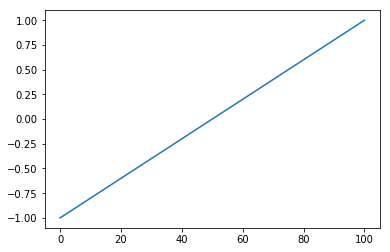

In [21]:
plt.plot(trX)

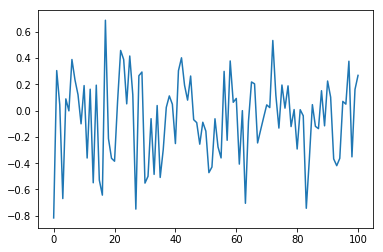

In [22]:
plt.plot(noise)

In [23]:
trY = 2 * trX + noise# create a y value which is approximately linear but with some random noise

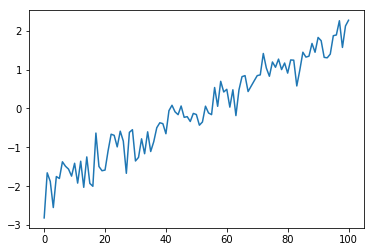

In [24]:
plt.plot(trY)

In [25]:
noise

array([-0.8159575 ,  0.30329225,  0.04343513, -0.66888867,  0.08825525,
       -0.00261038,  0.38730548,  0.2328959 ,  0.11965098, -0.10107762,
        0.18938405, -0.36084102,  0.16173955, -0.54898902,  0.19254418,
       -0.52855301, -0.64282986,  0.68572783, -0.21329123, -0.36296905,
       -0.3851782 ,  0.06972586,  0.45603593,  0.38790408,  0.05057052,
        0.41405664,  0.11931351, -0.74906694,  0.26429825,  0.29244123,
       -0.55145608, -0.499556  , -0.06210888, -0.48515854,  0.03774144,
       -0.50843144, -0.29661178,  0.02366387,  0.11088941,  0.04752318,
       -0.25111948,  0.30235628,  0.40038675,  0.19214327,  0.07893858,
        0.26200889, -0.06969713, -0.0919435 , -0.2558073 , -0.08916318,
       -0.1566411 , -0.47204135, -0.42938988, -0.06276757, -0.2772339 ,
       -0.36021085,  0.29730545, -0.22624355,  0.37644887,  0.06239889,
        0.0917042 , -0.40721497, -0.00103371, -0.7049052 , -0.08380151,
        0.21671171,  0.20272492, -0.24632706, -0.14788923, -0.05

In [26]:
model = Sequential()
model.add(Dense(input_dim=1, output_dim=1, init='uniform',activation='linear'))
model.compile(optimizer='sgd', loss='mse')

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="linear", units=1, kernel_initializer="uniform")`
  


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Print initial weights
weights = model.layers[0].get_weights()
print(weights)
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weight w: %.2f, b: %.2f' % (w_init, b_init))

[array([[ 0.03714428]], dtype=float32), array([ 0.], dtype=float32)]
Linear regression model is initialized with weight w: 0.04, b: 0.00


In [30]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)

In [31]:
model.fit(trX,trY,nb_epoch=100,verbose=1,callbacks=[tensorboard])

/root/anaconda3/lib/python3.6/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
101/101 [==============================] - 0s 2ms/step - loss: 1.4125
Epoch 2/100
101/101 [==============================] - 0s 69us/step - loss: 1.3391
Epoch 3/100
101/101 [==============================] - 0s 134us/step - loss: 1.2534
Epoch 4/100
101/101 [==============================] - 0s 89us/step - loss: 1.1907
Epoch 5/100
101/101 [==============================] - 0s 89us/step - loss: 1.1194
Epoch 6/100
101/101 [==============================] - 0s 69us/step - loss: 1.0641
Epoch 7/100
101/101 [==============================] - 0s 103us/step - loss: 1.0136
Epoch 8/100
101/101 [==============================] - 0s 113us/step - loss: 0.9672
Epoch 9/100
101/101 [==============================] - 0s 89us/step - loss: 0.9181
Epoch 10/100
101/101 [==============================] - 0s 101us/step - loss: 0.8743
Epoch 11/100
101/101 [==============================] - 0s 82us/step - loss: 0.8339
Epoch 12/100
101/101 [==============================] - 0s 71us/step - loss: 0.796

101/101 [==============================] - 0s 92us/step - loss: 0.1051
Epoch 98/100
101/101 [==============================] - 0s 128us/step - loss: 0.1045
Epoch 99/100
101/101 [==============================] - 0s 85us/step - loss: 0.1042
Epoch 100/100
101/101 [==============================] - 0s 97us/step - loss: 0.1040


In [32]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]
print('Linear regression model is trained with weight w: %.2f, b: %.2f' % (w, b))

Linear regression model is trained with weight w: 1.89, b: -0.07


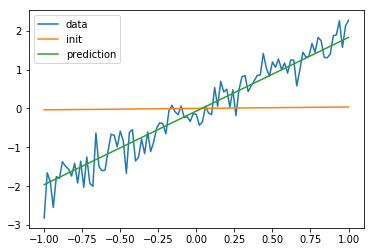

In [33]:
plt.plot(trX, trY, label='data')
plt.plot(trX, w_init*trX + b_init, label='init')
plt.plot(trX, w*trX + b, label='prediction')
plt.legend()
plt.show()

In [43]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [44]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.